In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import os

In [38]:
def few_shot_results(results_dir_few_shot):
  results_file_list = os.listdir(results_dir_few_shot)
  results_filename_list = []
  results_dataframe_list = []
  for filepath in results_file_list:
    results_filename_list.append(os.path.basename(filepath))
    results_dataframe_list.append(pd.read_csv(results_dir_few_shot+filepath).sample(frac=1))

  for i in range(len(results_dataframe_list)):
    print_confusion_matrix(results_dataframe_list[i], results_filename_list[i])

def print_confusion_matrix(dataframe, filename):
  true_class, prediction = dataframe["class"], dataframe["predicted"]

  confusion_matrix = ConfusionMatrixDisplay.from_predictions(true_class, prediction, cmap=plt.cm.Blues, normalize='true')
  
  confusion_matrix.ax_.set_title(filename+"\naccuracy = "+str(get_accuracy(dataframe, filename)))
  # print(confusion_matrix.confusion_matrix)

def get_accuracy(dataframe, filename):
  true_class, prediction = dataframe["class"], dataframe["predicted"]
  num_correct_predictions = 0
  for i in range(len(prediction)):
    if true_class[i] == prediction[i]:
      num_correct_predictions += 1
  accuracy = num_correct_predictions/len(prediction)*100
  return accuracy

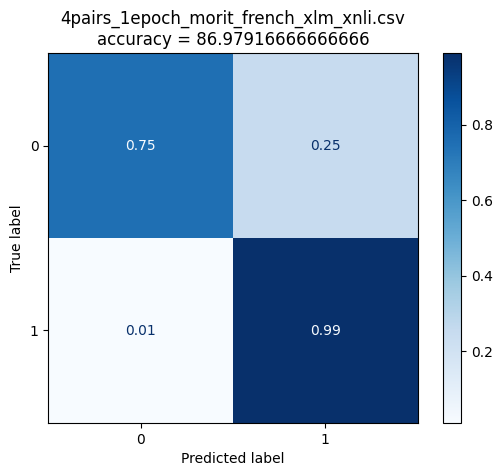

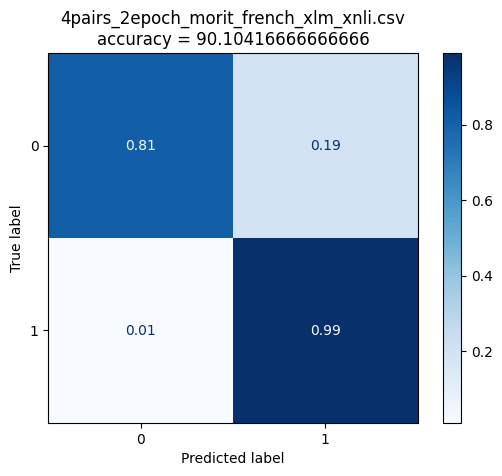

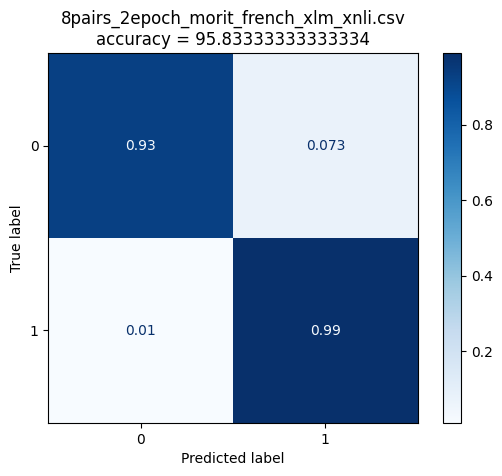

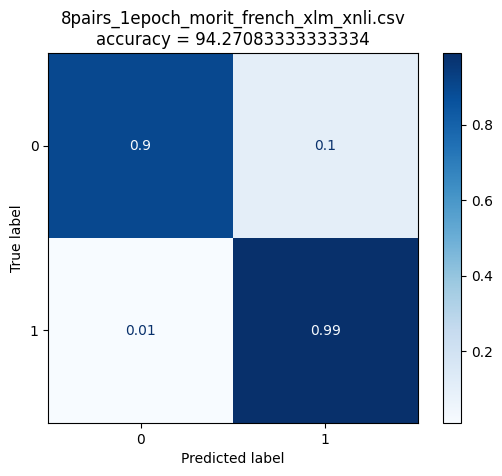

In [39]:
few_shot_results("../../results/few_shot/")